# Project notebook **<span style="COLOR:RED"></span>**


### Student 1 (first half presentation)
Name : Darren Xiao Li Wan
<br>Group : advanced
### Student 2 (second half presentation)
Name : Maher Abou Jaoude
<br>Group : advanced
### Data name : Kobe Bryant Shot Chart

### Data URL : http://stats.nba.com/stats/shotchartdetail?ContextMeasure=FGA&DateFrom=&DateTo=&GameID=&GameSegment=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&Period=0&PlayerID=977&PlayerPosition=&Position=&Season=2005-06&SeasonSegment=&SeasonType=Regular+Season&TeamID=0&VsConference=&VsDivision=&RookieYear=

### Short summary of the project and datasource :
<span style="COLOR:RED"> Data: All Shots for an NBA player throughout his career. We aim to study how likely a player is to score his shot knowing his positioning, distance from basket, shot type, area zone, position during shot... Being able to predict if a player scores from a certain position or certain location is extremely helpful to all the NBA teams today. Knowing how to defend to a player and from where to let him take his shots can limit his capabilities tremendously. 
Data source: NBA.com
</span>

## Aims : 
* Cleaning Data for comprehension and better use
* Exploring the data using numerical analysis
* Exploring the data using visualization of graphs and plots
* Building a model to predict if a player will score his shot
* Testing the model

In [60]:
%matplotlib inline
import requests
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime
import re
import sklearn
from sklearn import model_selection
import scipy.stats as stats

import os
import json

## Download :

* We load the .json data directly from the ShotChartDetail endpoint of stats.nba.com
* If connection times out, the .json files are hosted on github
* The defined function allows us to get custom player data (using player id and season range)

In [61]:
def getShotChartDetail(p, startYear, endYear):
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'}
    df_list_player=[]
    df_list_avg=[]
    for i in range(startYear, endYear+1):
        s=str(i-1)+'-'+str(i)[-2:]
        url="https://stats.nba.com/stats/shotchartdetail?ContextMeasure=FGA&DateFrom=&DateTo=&GameID=&GameSegment=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&Period=0&PlayerID={0}&PlayerPosition=&Position=&Season={1}&SeasonSegment=&SeasonType=Regular+Season&TeamID=0&VsConference=&VsDivision=&RookieYear=".format(p, s)
        response=requests.get(url, headers=headers)
        data=json.loads(response.text)
        tmpplayer=pd.DataFrame(data['resultSets'][0]['rowSet'], columns=data['resultSets'][0]['headers'])
        tmpavg=pd.DataFrame(data['resultSets'][1]['rowSet'], columns=data['resultSets'][1]['headers'])
        tmpplayer["SEASON"], tmpavg["SEASON"] = [i,i]
        df_list_player.append(tmpplayer)
        df_list_avg.append(tmpavg)
    return([pd.concat(df_list_player),pd.concat(df_list_avg)])

In [62]:
def getShotChartDetailGithub(startYear, endYear):
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'}
    df_list_player=[]
    df_list_avg=[]
    for i in range(startYear, endYear+1):
        s=str(i-1)+'-'+str(i)[-2:] 
        url="https://raw.githubusercontent.com/MAP536/PythonProject/master/json/kobe{}.json".format(i)
        response=requests.get(url, headers=headers)
        data=json.loads(response.text)
        tmpplayer=pd.DataFrame(data['resultSets'][0]['rowSet'], columns=data['resultSets'][0]['headers'])
        tmpavg=pd.DataFrame(data['resultSets'][1]['rowSet'], columns=data['resultSets'][1]['headers'])
        tmpplayer["SEASON"], tmpavg["SEASON"] = [i,i]
        df_list_player.append(tmpplayer)
        df_list_avg.append(tmpavg)
    return([pd.concat(df_list_player),pd.concat(df_list_avg)])

In [63]:
kobe, avg=getShotChartDetailGithub(1997,2016)
kobe.shape

(26198, 25)

In [64]:
pd.set_option("display.max_columns", None)
kobe


,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,SEASON
0,Shot Chart Detail,0029600027,102,977,Kobe Bryant,1610612747,Los Angeles Lakers,1,0,42,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,-140,116,1,0,19961103,LAL,MIN,1997
1,Shot Chart Detail,0029600031,127,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,10,8,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,16,-131,97,1,0,19961105,NYK,LAL,1997
2,Shot Chart Detail,0029600044,124,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,8,37,Made Shot,Jump Shot,3PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,23,-142,181,1,1,19961106,CHH,LAL,1997
3,Shot Chart Detail,0029600044,144,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,6,34,Missed Shot,Jump Shot,3PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,0,1,0,19961106,CHH,LAL,1997
4,Shot Chart Detail,0029600044,151,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,5,27,Made Shot,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,13,-10,138,1,1,19961106,CHH,LAL,1997
5,Shot Chart Detail,0029600057,157,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,7,18,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Right Side Center(RC),16-24 ft.,19,75,177,1,0,19961108,TOR,LAL,1997
6,Shot Chart Detail,0029600057,226,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,2,16,Made Shot,Jump Shot,3PT Field Goal,Mid-Range,Center(C),16-24 ft.,23,-64,223,1,1,19961108,TOR,LAL,1997
7,Shot Chart Detail,0029600057,321,977,Kobe Bryant,1610612747,Los Angeles Lakers,3,3,25,Made Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,0,1,1,19961108,TOR,LAL,1997
8,Shot Chart Detail,0029600057,334,977,Kobe Bryant,1610612747,Los Angeles Lakers,3,1,53,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,19,-79,177,1,0,19961108,TOR,LAL,1997
9,Shot Chart Detail,0029600057,337,977,Kobe Bryant,1610612747,Los Angeles Lakers,3,1,14,Made Shot,Jump Shot,3PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,23,-103,207,1,1,19961108,TOR,LAL,1997


## Data charaterisctics :
* Identifying data and datatypes
* Ceaning up data
* Analyzing outliers
* Manupilating dataframe for our model later

In [65]:
df_kobe=kobe.copy()

# Split into integer and categorical columns
intcol,objcol=[],[]
for i in df_kobe.columns:
    print(i, ": ", df_kobe[i].dtype.name)
    intcol.append(i) if df_kobe[i].dtype.name=='int64' else objcol.append(i)

GRID_TYPE :  object
GAME_ID :  object
GAME_EVENT_ID :  int64
PLAYER_ID :  int64
PLAYER_NAME :  object
TEAM_ID :  int64
TEAM_NAME :  object
PERIOD :  int64
MINUTES_REMAINING :  int64
SECONDS_REMAINING :  int64
EVENT_TYPE :  object
ACTION_TYPE :  object
SHOT_TYPE :  object
SHOT_ZONE_BASIC :  object
SHOT_ZONE_AREA :  object
SHOT_ZONE_RANGE :  object
SHOT_DISTANCE :  int64
LOC_X :  int64
LOC_Y :  int64
SHOT_ATTEMPTED_FLAG :  int64
SHOT_MADE_FLAG :  int64
GAME_DATE :  object
HTM :  object
VTM :  object
SEASON :  int64


### Categorical data
* Analyzing Categorical Variables
* Creating or deleting Categorical Variables
* Grouping of some categorical variables to make data more meaningful

In [66]:
# Check the rate of categorical entries
for i in objcol:
    print("{0}: \n{1}\n".format(i,df_kobe[i].value_counts()))

GRID_TYPE: 
Shot Chart Detail    26198
Name: GRID_TYPE, dtype: int64

GAME_ID: 
0021501228    50
0020200069    47
0020500591    46
0020600431    45
0020700553    44
0020601081    44
0020500480    41
0020200743    41
0021200398    41
0020200127    40
0020500988    39
0020600977    39
0020200769    38
0020501078    38
0020600340    38
0020800884    38
0020500412    37
0020900527    37
0020701082    37
0020200142    37
0020601016    37
0021400056    37
0020500192    36
0020500114    36
0020200223    35
0020200372    35
0020500563    35
0020500130    35
0020000267    35
0020600994    35
              ..
0029701022     4
0020001059     4
0029600698     4
0021200971     4
0029600112     4
0029600488     3
0029600072     3
0029600727     3
0029600362     3
0029600432     3
0029600991     3
0029600044     3
0029600781     2
0020400518     2
0029600136     2
0021500906     2
0029600219     2
0029600095     2
0029600844     2
0029600382     2
0029600086     2
0029600202     1
0029700933     1
00

In [67]:
df=df_kobe.copy()

# Reset index
df=df.reset_index(drop=True)

# Add opponents
df['OPP']=np.where(df.HTM=='LAL', df.VTM, df.HTM)

# Aggregate shot types
shot_labels={"Dunk":"Dunk Shot","Layup|Finger":"Layup Shot","Hook":"Hook Shot","Jump|Bank|Fadeaway":"Jump Shot","Tip":"Tip Shot"}
df["ACTION_TYPE2"]=df.ACTION_TYPE
for k, v in shot_labels.items():
    df.loc[df.ACTION_TYPE.str.contains(k),"ACTION_TYPE"] = v
    
# Format date
df['GAME_DATE']=df.GAME_DATE.apply(lambda x: datetime.datetime.strptime(x, '%Y%m%d'))

# Check if event_flag same as shot_made_flag
df.SHOT_MADE_FLAG.eq(df.EVENT_TYPE.replace("Missed Shot",0).replace("Made Shot",1)).value_counts()

# Create CLUTCH_SHOT column
CLUTCH_SHOT = (df.PERIOD >= 4) & (df.MINUTES_REMAINING <= 5)
df['CLUTCH_SHOT'] = CLUTCH_SHOT.astype('uint8')

# Transform details of actiontype into indicator variables
df['ACTION_TYPE2']=list(map(lambda x: re.sub('Jump|Layup|Dunk|Hook|Tip|Shot|-','',x, flags=re.IGNORECASE).strip(),df.ACTION_TYPE2))
for i in ['Finger Roll','Step Back','Alley Oop','Follow Up']:
    df['ACTION_TYPE2']=list(map(lambda x: re.sub(i,i.replace(' ',''),x),df['ACTION_TYPE2']))
    
# Remove empty
action_detail=list(set(filter(None, df.ACTION_TYPE2)))
action_detail=list(set(' '.join(action_detail).upper().split(' ')))

df['ACTION_TYPE2']=df.ACTION_TYPE2.str.upper()
for i in action_detail:
    df[i]=np.where(df.ACTION_TYPE2.str.contains(i),1,0)
df=df.drop('ACTION_TYPE2',axis=1)

#clean shot_zone_area
df['SHOT_ZONE_AREA']=df.SHOT_ZONE_AREA.apply(lambda x: re.sub('\(\S*\)','',x))
df['SHOT_ZONE_AREA']=df.SHOT_ZONE_AREA.apply(lambda x: re.sub(' ','_',x))

#shot_type
df['SHOT_TYPE']=np.where(df.SHOT_TYPE=='2PT Field Goal',0,1)
df=df.rename(index=str, columns={"SHOT_TYPE": "THREE_POINT_SHOT"})

In [68]:
df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,THREE_POINT_SHOT,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,SEASON,OPP,CLUTCH_SHOT,PUTBACK,REVERSE,ALLEYOOP,PULLUP,SLAM,FLOATING,FINGERROLL,TURNAROUND,DRIVING,RUNNING,FADEAWAY,STEPBACK,BANK,CUTTING,FOLLOWUP
0,Shot Chart Detail,0029600027,102,977,Kobe Bryant,1610612747,Los Angeles Lakers,1,0,42,Missed Shot,Jump Shot,0,Mid-Range,Left_Side_Center,16-24 ft.,18,-140,116,1,0,1996-11-03,LAL,MIN,1997,MIN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Shot Chart Detail,0029600031,127,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,10,8,Missed Shot,Jump Shot,0,Mid-Range,Left_Side_Center,16-24 ft.,16,-131,97,1,0,1996-11-05,NYK,LAL,1997,NYK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Shot Chart Detail,0029600044,124,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,8,37,Made Shot,Jump Shot,1,Mid-Range,Left_Side_Center,16-24 ft.,23,-142,181,1,1,1996-11-06,CHH,LAL,1997,CHH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Shot Chart Detail,0029600044,144,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,6,34,Missed Shot,Jump Shot,1,Restricted Area,Center,Less Than 8 ft.,0,0,0,1,0,1996-11-06,CHH,LAL,1997,CHH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Shot Chart Detail,0029600044,151,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,5,27,Made Shot,Jump Shot,0,In The Paint (Non-RA),Center,8-16 ft.,13,-10,138,1,1,1996-11-06,CHH,LAL,1997,CHH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Shot Chart Detail,0029600057,157,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,7,18,Missed Shot,Jump Shot,0,Mid-Range,Right_Side_Center,16-24 ft.,19,75,177,1,0,1996-11-08,TOR,LAL,1997,TOR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Shot Chart Detail,0029600057,226,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,2,16,Made Shot,Jump Shot,1,Mid-Range,Center,16-24 ft.,23,-64,223,1,1,1996-11-08,TOR,LAL,1997,TOR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Shot Chart Detail,0029600057,321,977,Kobe Bryant,1610612747,Los Angeles Lakers,3,3,25,Made Shot,Layup Shot,0,Restricted Area,Center,Less Than 8 ft.,0,0,0,1,1,1996-11-08,TOR,LAL,1997,TOR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Shot Chart Detail,0029600057,334,977,Kobe Bryant,1610612747,Los Angeles Lakers,3,1,53,Missed Shot,Jump Shot,0,Mid-Range,Left_Side_Center,16-24 ft.,19,-79,177,1,0,1996-11-08,TOR,LAL,1997,TOR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Shot Chart Detail,0029600057,337,977,Kobe Bryant,1610612747,Los Angeles Lakers,3,1,14,Made Shot,Jump Shot,1,Mid-Range,Left_Side_Center,16-24 ft.,23,-103,207,1,1,1996-11-08,TOR,LAL,1997,TOR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [69]:
# Drop unnecessary categorical columns
## GRID_TYPE,PLAYER_NAME,TEAM_NAME,EVENT_TYPE contain only one value each
## GAME_ID~GAME_DATE, VTM~OPP,HTM, SHOT_ZONE_BASIC/SHOT_ZONE_RANGE~LOC_X/LOC_Y
df['SECONDS_REMAINING']=df.SECONDS_REMAINING+df.MINUTES_REMAINING*60
df=df.drop(['GRID_TYPE','GAME_ID','PLAYER_NAME','TEAM_NAME','SHOT_ZONE_BASIC','SHOT_ZONE_RANGE','VTM', 'GAME_EVENT_ID','PLAYER_ID','TEAM_ID','MINUTES_REMAINING','SHOT_ATTEMPTED_FLAG'], axis=1)

#'GRID_TYPE','GAME_ID','PLAYER_NAME','TEAM_NAME','EVENT_TYPE','SHOT_ZONE_BASIC','SHOT_ZONE_RANGE','VTM'


for i in df.columns:
    if df[i].dtype=="object":
        df[i]=df[i].astype('category')
        
# Split into integer and categorical columns
## We purposely use different types of data for integers to select later by data type
intcol,objcol=[],[]
for i in df.columns:
    print(i, ": ", df[i].dtype.name)
    intcol.append(i) if df[i].dtype.name=='int64' else objcol.append(i)

PERIOD :  int64
SECONDS_REMAINING :  int64
EVENT_TYPE :  category
ACTION_TYPE :  category
THREE_POINT_SHOT :  int32
SHOT_ZONE_AREA :  category
SHOT_DISTANCE :  int64
LOC_X :  int64
LOC_Y :  int64
SHOT_MADE_FLAG :  int64
GAME_DATE :  datetime64[ns]
HTM :  category
SEASON :  int64
OPP :  category
CLUTCH_SHOT :  uint8
PUTBACK :  int32
REVERSE :  int32
ALLEYOOP :  int32
PULLUP :  int32
SLAM :  int32
FLOATING :  int32
FINGERROLL :  int32
TURNAROUND :  int32
DRIVING :  int32
RUNNING :  int32
FADEAWAY :  int32
STEPBACK :  int32
BANK :  int32
CUTTING :  int32
FOLLOWUP :  int32


### Numerical
* Studying outliers of quantitative variables
* Studying relations between quantitative variables through numerical analysis

In [70]:
df.describe()

,PERIOD,SECONDS_REMAINING,THREE_POINT_SHOT,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_MADE_FLAG,SEASON,CLUTCH_SHOT,PUTBACK,REVERSE,ALLEYOOP,PULLUP,SLAM,FLOATING,FINGERROLL,TURNAROUND,DRIVING,RUNNING,FADEAWAY,STEPBACK,BANK,CUTTING,FOLLOWUP
count,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000
mean,2.515230,320.225246,0.211619,13.471105,7.694175,91.065959,0.447248,2006.572525,0.156081,0.000687,0.019734,0.006909,0.016948,0.015955,0.003779,0.007023,0.052828,0.084930,0.035041,0.050424,0.004122,0.016528,0.000267,0.000573
std,1.154735,207.855999,0.408464,9.366627,110.675088,87.550054,0.497219,4.947801,0.362939,0.026204,0.139089,0.082834,0.129079,0.125305,0.061358,0.083513,0.223695,0.278783,0.183887,0.218822,0.064075,0.127497,0.016344,0.023922
min,1.000000,0.000000,0.000000,0.000000,-250.000000,-44.000000,0.000000,1997.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,142.000000,0.000000,5.000000,-68.000000,4.000000,0.000000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,302.000000,0.000000,15.000000,0.000000,74.000000,0.000000,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,496.750000,0.000000,21.000000,97.000000,160.000000,1.000000,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,714.000000,1.000000,74.000000,248.000000,741.000000,1.000000,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text xticklabel objects>)

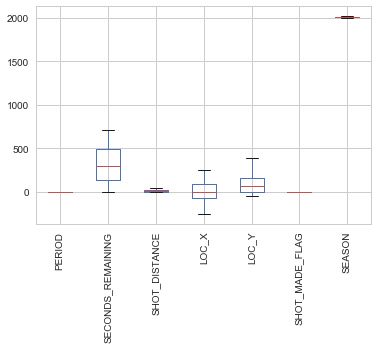

In [71]:
bp=df.boxplot(column=intcol[:], return_type="both")
plt.xticks(rotation=90)

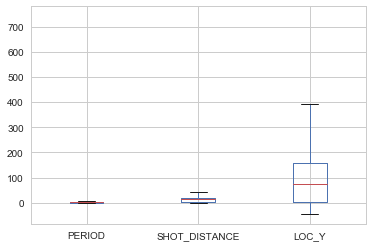

In [72]:
# Checking for columns with outliers
whiskers=[bp.lines["whiskers"][i:i+2] for i in range(0,len(bp.lines["whiskers"]),2)]
outliers=[]
for idx, i in enumerate(intcol[:]):
    if min(df[i])<whiskers[idx][0].get_ydata()[1] or max(df[i])>whiskers[idx][1].get_ydata()[1]: outliers.append(i)
outliers_bp=df.boxplot(column=outliers, return_type="both")

In [73]:
print(df.PERIOD.value_counts())
print(df[['SHOT_DISTANCE','LOC_Y']].describe())


3    7113
1    6915
4    6132
2    5710
5     283
6      38
7       7
Name: PERIOD, dtype: int64
       SHOT_DISTANCE         LOC_Y
count   26198.000000  26198.000000
mean       13.471105     91.065959
std         9.366627     87.550054
min         0.000000    -44.000000
25%         5.000000      4.000000
50%        15.000000     74.000000
75%        21.000000    160.000000
max        74.000000    741.000000


* Outliers within reasonable range - explained by overtime and half court shots
* LOC_Y and SHOT_DISTANCE within reasonable range (84 ft court length)

In [74]:
df[df.LOC_Y>=outliers_bp.lines["whiskers"][5].get_ydata()[1]][['SHOT_DISTANCE','SECONDS_REMAINING']]

,SHOT_DISTANCE,SECONDS_REMAINING
1025,42,0
1234,58,1
1310,53,0
1315,43,0
1327,44,0
1429,58,0
2538,59,0
2541,40,0
3261,48,0
3474,47,0


* We confirm that long distance shots are shot in the last seconds of a period


In [75]:
df[df.SHOT_DISTANCE>=outliers_bp.lines["whiskers"][3].get_ydata()[1]][['SHOT_DISTANCE','SECONDS_REMAINING']]

,SHOT_DISTANCE,SECONDS_REMAINING
1234,58,1
1310,53,0
1429,58,0
2538,59,0
3261,48,0
3474,47,0
3619,48,0
3694,45,0
3882,62,0
4370,70,0


### Exploration

In [76]:
df.groupby('SHOT_MADE_FLAG').mean()

,PERIOD,SECONDS_REMAINING,THREE_POINT_SHOT,SHOT_DISTANCE,LOC_X,LOC_Y,SEASON,CLUTCH_SHOT,PUTBACK,REVERSE,ALLEYOOP,PULLUP,SLAM,FLOATING,FINGERROLL,TURNAROUND,DRIVING,RUNNING,FADEAWAY,STEPBACK,BANK,CUTTING,FOLLOWUP
SHOT_MADE_FLAG,,,,,,,,,,,,,,,,,,,,,,,
0,2.548443,315.335129,0.256819,15.181203,7.895725,102.999931,2006.672191,0.167254,0.000345,0.010427,0.001865,0.009115,0.000552,0.002279,0.002900,0.038671,0.033906,0.015745,0.037912,0.002831,0.007044,0.000138,0.000069
1,2.474183,326.268925,0.155757,11.357600,7.445080,76.316805,2006.449347,0.142272,0.001109,0.031237,0.013143,0.026628,0.034992,0.005633,0.012119,0.070325,0.147990,0.058889,0.065887,0.005718,0.028250,0.000427,0.001195


* We notice significantly higher average for LOC_Y for shot made whereas LOC_X only shows little difference due to symmetry of the category. The positive number indicates a tendency to shoot from the right hand side.

In [77]:
def group_cat(cat):
    c=pd.DataFrame(df.groupby([cat,'SHOT_MADE_FLAG']).count().iloc[:,1].rename('COUNT'))
    return(pd.concat([df.groupby([cat,'SHOT_MADE_FLAG']).mean(), c], axis=1))

In [78]:
group_cat('BANK')

PERIOD  SECONDS_REMAINING  THREE_POINT_SHOT  \
BANK SHOT_MADE_FLAG                                                  
0    0               2.551221         315.231031          0.258432   
     1               2.474706         326.033199          0.159845   
1    0               2.156863         330.009804          0.029412   
     1               2.456193         334.377644          0.015106   

                     SHOT_DISTANCE      LOC_X       LOC_Y       SEASON  \
BANK SHOT_MADE_FLAG                                                      
0    0                   15.211698   8.284443  103.344043  2006.647959   
     1                   11.394432   8.671439   77.016512  2006.376778   
1    0                   10.882353 -46.901961   54.490196  2010.088235   
     1                   10.090634 -34.740181   52.247734  2008.945619   

                     CLUTCH_SHOT   PUTBACK   REVERSE  ALLEYOOP    PULLUP  \
BANK SHOT_MADE_FLAG                                                        
0    0                  0.167745  0.000348  0.010501  0.001878  0.008832   
     1                  0.143422  0.001142  0.032145  0.013525  0.026875   
1    0                  0.098039  0.000000  0.000000  0.000000  0.049020   
     1                  0.102719  0.000000  0.000000  0.000000  0.018127   

                         SLAM  FLOATING  FINGERROLL  TURNAROUND   DRIVING  \
BANK SHOT_MADE_FLAG                                                         
0    0               0.000556  0.002295    0.002921    0.037833  0.034008   
     1               0.036009  0.005709    0.012471    0.067803  0.151941   
1    0               0.000000  0.000000    0.000000    0.156863  0.019608   
     1               0.000000  0.003021    0.000000    0.157100  0.012085   

                      RUNNING  FADEAWAY  STEPBACK   CUTTING  FOLLOWUP  COUNT  
BANK SHOT_MADE_FLAG                                                           
0    0               0.015161  0.037833  0.002851  0.000139   0.00007  14379  
     1               0.058581  0.065958  0.005884  0.000439   0.00123  11386  
1    0               0.098039  0.049020  0.000000  0.000000   0.00000    102  
     1               0.069486  0.063444  0.000000  0.000000   0.00000    331

* We observe that the made bank shots tend to come at a close to 45° angle from midrange as opposed to being aligned with the basket from high range.

In [79]:
group_cat('ACTION_TYPE')

PERIOD  SECONDS_REMAINING  THREE_POINT_SHOT  \
ACTION_TYPE SHOT_MADE_FLAG                                                  
Dunk Shot   0               2.649351         344.727273          0.000000   
            1               2.468391         316.360153          0.000000   
Hook Shot   0               2.310811         347.864865          0.000000   
            1               2.400000         317.715789          0.000000   
Jump Shot   0               2.553929         315.245073          0.304113   
            1               2.484641         329.743844          0.231658   
Layup Shot  0               2.519221         312.104343          0.000000   
            1               2.447637         321.305482          0.000000   
Tip Shot    0               2.561224         344.948980          0.000000   
            1               2.490909         270.090909          0.000000   

                            SHOT_DISTANCE      LOC_X       LOC_Y       SEASON  \
ACTION_TYPE SHOT_MADE_FLAG                                                      
Dunk Shot   0                    0.142857  -1.285714    1.350649  2003.766234   
            1                    0.163793   0.471264    1.313218  2004.558429   
Hook Shot   0                    5.945946  10.891892   40.324324  2007.689189   
            1                    5.421053   9.842105   40.368421  2008.389474   
Jump Shot   0                   17.862049   9.234116  121.143021  2006.866792   
            1                   16.671617  10.697639  111.873953  2006.820005   
Layup Shot  0                    0.467299   0.333000    3.425861  2005.720419   
            1                    0.392060   0.582231    2.861248  2006.066919   
Tip Shot    0                    0.173469   0.408163    1.367347  2003.357143   
            1                    0.272727  -0.163636    1.581818  2004.290909   

                            CLUTCH_SHOT   PUTBACK   REVERSE  ALLEYOOP  \
ACTION_TYPE SHOT_MADE_FLAG                                              
Dunk Shot   0                  0.142857  0.012987  0.051948  0.064935   
            1                  0.140805  0.004789  0.073755  0.096743   
Hook Shot   0                  0.121622  0.000000  0.000000  0.000000   
            1                  0.147368  0.000000  0.000000  0.000000   
Jump Shot   0                  0.169597  0.000000  0.000000  0.000000   
            1                  0.144072  0.000000  0.000000  0.000000   
Layup Shot  0                  0.158762  0.001997  0.073390  0.010984   
            1                  0.136484  0.003025  0.109263  0.020038   
Tip Shot    0                  0.102041  0.000000  0.000000  0.000000   
            1                  0.181818  0.000000  0.000000  0.000000   

                              PULLUP      SLAM  FLOATING  FINGERROLL  \
ACTION_TYPE SHOT_MADE_FLAG                                             
Dunk Shot   0               0.000000  0.103896  0.000000    0.000000   
            1               0.000000  0.392720  0.000000    0.000000   
Hook Shot   0               0.000000  0.000000  0.000000    0.000000   
            1               0.000000  0.000000  0.000000    0.000000   
Jump Shot   0               0.010794  0.000000  0.002699    0.000000   
            1               0.039604  0.000000  0.008378    0.000000   
Layup Shot  0               0.000000  0.000000  0.000000    0.020969   
            1               0.000000  0.000000  0.000000    0.053686   
Tip Shot    0               0.000000  0.000000  0.000000    0.000000   
            1               0.000000  0.000000  0.000000    0.000000   

                            TURNAROUND   DRIVING   RUNNING  FADEAWAY  \
ACTION_TYPE SHOT_MADE_FLAG                                             
Dunk Shot   0                 0.000000  0.103896  0.038961  0.000000   
            1                 0.000000  0.288314  0.015326  0.000000   
Hook Shot   0                 0.067568  0.081081  0.121622  0.000000   
            1                 

* The above table is rich with conclusions, however, the most important ones concerning Action Type are that Kobe takes most of his shots as jump shots. It is of no surprise that he prefers to jump shoot (it is Kobe Bryant). Moreover, most of his jumpshots are fadeaways and pullups, also another trademark of Kobe Bryant. 

### Data visualisation and representation

* Plotting shooting percentages over the career and under different conditions
* Plotting the shot distributions on the basketball court as well as a hexbin histogram
* Studying signficance of quantitative variables with variable to predict through boxplots
* Studying signficance of categorical variables with variable to predict through stacked barcharts
* Applying Goodness of Fit Test or Chi-squared Test to check significance between categorical variables and variable to predict

In [80]:
import seaborn as sns

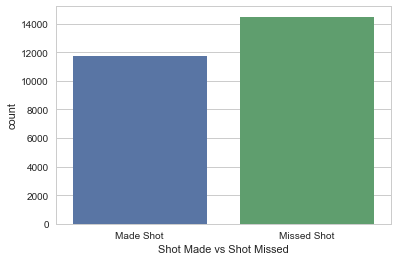

In [81]:
# CountPlot of Made Shots
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

sns.countplot(x = "EVENT_TYPE", data = df)
plt.xlabel("Shot Made vs Shot Missed")
plt.show()

* A basic bar chart showing the number of shots Kobe has made in his career vs. the ones he missed. It is expected to have more missed than made because never has a player ended his career with more than 50% Field Goal Percentage.


 Oberserved Table


,Jump Shot,Layup Shot,Dunk Shot,Tip Shot,Hook Shot,Total
Made,77,74,12229,2003,98,14481
Missed,1044,95,7878,2645,55,11717
Total,1121,169,20107,4648,153,26198



 Expected Table


,Jump Shot,Layup Shot,Dunk Shot,Tip Shot,Hook Shot
Made,619.635125,93.415108,11114.186846,2569.191847,84.571074
Missed,501.364875,75.584892,8992.813154,2078.808153,68.428926


p value of Chi Squared statistic for ACTION_TYPE: 0.0 with 4 Degrees of Freedom
ACTION_TYPE is significant to Made or Miss Shot

 Oberserved Table


,0,1,Total
Made,10762,3719,14481
Missed,9892,1825,11717
Total,20654,5544,26198



 Expected Table


,0,1
Made,11416.542255,3064.457745
Missed,9237.457745,2479.542255


p value of Chi Squared statistic for THREE_POINT_SHOT: 0.0 with 1 Degrees of Freedom
THREE_POINT_SHOT is significant to Made or Miss Shot

 Oberserved Table


,Left_Side_Center,Center,Right_Side_Center,Right_Side,Left_Side,Back_Court,Total
Made,66,5340,1913,2227,2360,2575,14481
Missed,1,6056,1263,1248,1580,1569,11717
Total,67,11396,3176,3475,3940,4144,26198



 Expected Table


,Left_Side_Center,Center,Right_Side_Center,Right_Side,Left_Side,Back_Court
Made,37.034392,6299.163142,1755.540728,1920.813612,2177.843347,2290.604779
Missed,29.965608,5096.836858,1420.459272,1554.186388,1762.156653,1853.395221


p value of Chi Squared statistic for SHOT_ZONE_AREA: 0.0 with 5 Degrees of Freedom
SHOT_ZONE_AREA is significant to Made or Miss Shot


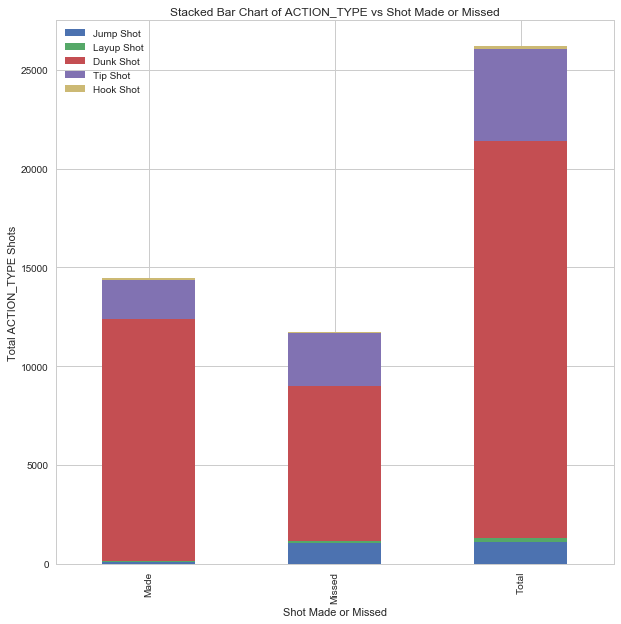

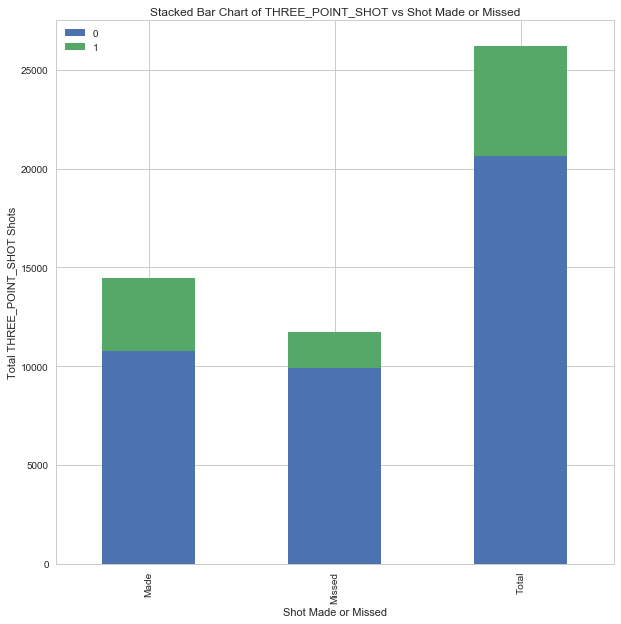

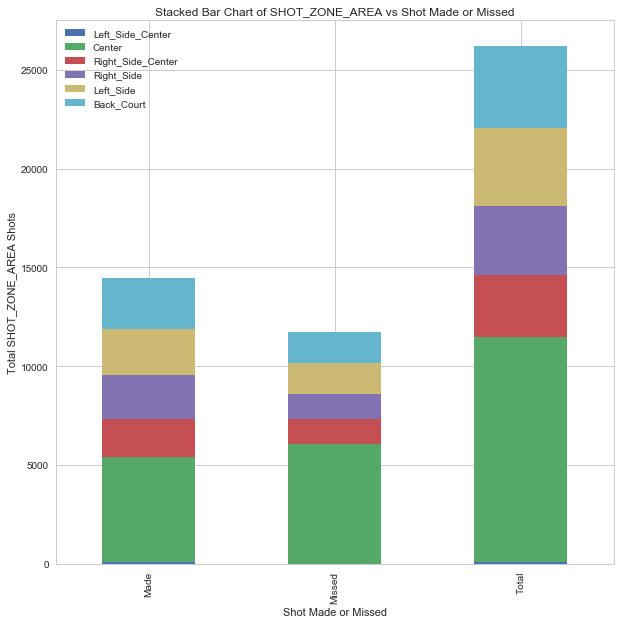

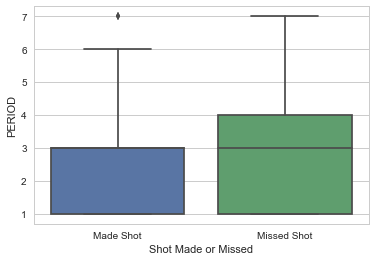

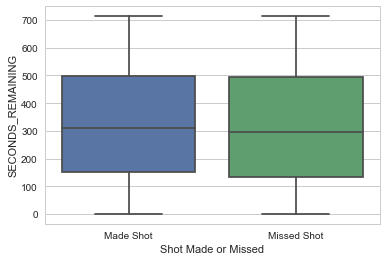

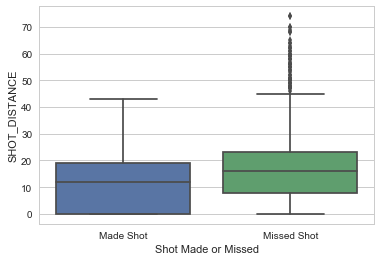

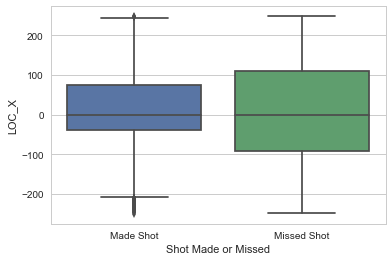

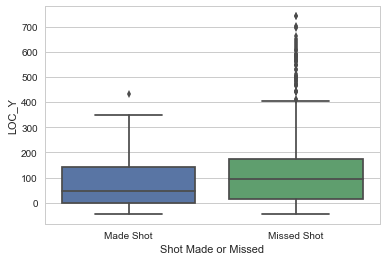

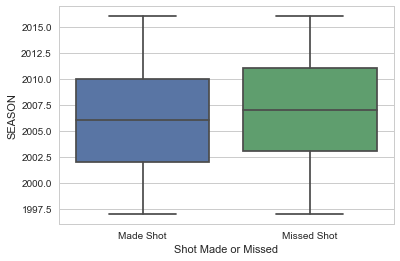

In [82]:
# This function detects quantitative and categorical variables in the dataframe
# Pl* The above table is rich with conclusions, however, the most important ones concerning Action Type are that Kobe takes most of his shots as jump shots. It is of no surprise that he prefers to jump shoot (it is Kobe Bryant). Moreover, most of his jumpshots are fadeaways and pullups, also another trademark of Kobe Bryant. ots Boxplots for quantitative variable with variable to predict
# Plots Stacked Barcharts for categorical variables with variable to predict
# Plots Contingency tables for categorical variables
# Applies Chi-squared test for categorical variables and gets p value to check for significance

def quant_qual_plots(df, cat_nb):
    quant_variables = []
    qual_variables = []
    
    kf = df.copy()
    kf = kf.drop("EVENT_TYPE", axis = 1)
    # Get Quant and Qual variables
    for idx, i in enumerate(kf.columns):
        if kf[i].dtype.name=="category" or i=="THREE_POINT_SHOT":
            qual_variables.append(kf.columns[idx])
        elif i!="GAME_DATE" and max(kf[i])-min(kf[i]) > 1:
            quant_variables.append(kf.columns[idx])
    
    tabs = []
    # Barcharts for qual variables
    for idx, j in enumerate(qual_variables):
        if len(df[j].unique()) < cat_nb:
            # Contingency Table
            tab = pd.crosstab(index = df["SHOT_MADE_FLAG"], columns=df[j], margins = True)
            
            # Observed and Expected Tables
            ## Observed
            columns = list(pd.unique(df[j]))
            columns.append("Total")
            tab.index = ["Made", "Missed", "Total"]
            tab.columns = columns
            observed = pd.DataFrame(tab.iloc[0:-1,0:-1])
            
            ## Expected
            total = tab.iloc[-1,-1]
            expected =  pd.DataFrame(np.outer(tab["Total"][0:-1], tab.iloc[-1][0:-1]) / total)
            expected.index = ["Made", "Missed"]
            columns.remove("Total")
            expected.columns = columns
            
            # Chi Square Test
            chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
            
            # Degrees of freedom
            dof = (len(list(pd.unique(df[j]))) - 1)*(len(list(pd.unique(df["SHOT_MADE_FLAG"]))) - 1)
            
            # p value 
            p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,df=dof)
            print("\n Oberserved Table")                                     
            display(tab)
            print("\n Expected Table")   
            display(expected)
            print("p value of Chi Squared statistic for {}: {} with {} Degrees of Freedom".format(j, p_value, dof))
            if p_value < 0.05: 
                print("{} is significant to Made or Miss Shot".format(j))
            else:
                print("{} is NOT significant to Made or Miss Shot".format(j))
            plt.figure(idx)
            tabplot = tab.iloc[:,0:-1]
            tabplot.plot(kind="bar", 
                 figsize=(10, 10),
                 stacked=True)
            plt.title('Stacked Bar Chart of {} vs Shot Made or Missed'.format(j))
            plt.xlabel('Shot Made or Missed')
            plt.ylabel('Total {} Shots'.format(j))
        else:
            continue

    # Boxplots for quant variables
    for idx, j in enumerate(quant_variables):
        plt.figure(len(qual_variables) + 1 + idx)
        sns.boxplot(y=df[j], x=df["EVENT_TYPE"], data = df)
        plt.xlabel('Shot Made or Missed')
    
    return qual_variables, quant_variables


k = quant_qual_plots(df, 8)

#### Categorical Visualization
* Observed tables is the actual observed count for each category of the categorical variables and expected is the expected count based on the distribution of the population for the corresponding category.
* Calculate the chi-squared statistic with the following formula: 
$$ \sum \ \frac{(Observed - Expected)^2}{Expected} $$
* Using the above statistc for each categorical variable, we get the p value from the Chi-square distribution. If p value < 0.05 ==> observed values deviate alot from expected values ==> there is a significant relationship between categorical variable and making the shot.
* We only applied the test for Shot type, Area Zone, and Three Pointer because the notebook will run out of memory if we plot it for every categorical variable we have. Moreover, these three variables contain the most variability and each is correlated to one or more of the other categorical variables. And we notice that all of these three categorical variables have very small p values, approximately zero. Therefore we can say that all of our categorical variables are significant to our model later.

#### Quantitative Visualization
* As for the quantitative variables, we plotted the boxplotsto compare the means and variances of the quantitative variables when Kobe makes or misses the shot. If the means differ significantly ==> there is a significant relationship between that quantitative variable and making or missing a shot.
* Studying the boxplots, we notice that for Period, Season, Seconds Remaining, Shot Distance, Y Location almost all of them have different means for made or missed shots. This implies that the above quantitative variables have a significant relationship with making or missing a shot. However, the only quantitative variable with same means for both is X Location stating that on which side of the basket Kobe shoots is not that important to making or missing a shot.
* It is important to note that if two quantitative variables are independently related to our variable we want to predict, we might find different results in the model. Even though, distance and Y Location are both important for predicting, distance contains the variances of Y Location. Therefore we expect that one of distance or Y Location will have an insignificant parameter in our logistic regression model.

#### Other Interesting Plots
* These plots are not statistical ones, do not help with our model later.
* However, they are interesting to realize the findings we will discuss below.

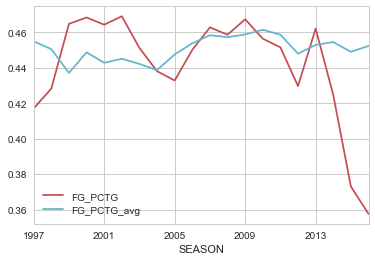

In [83]:
# Field Goal Percentage timeseries
tmp=df[['SEASON','SHOT_MADE_FLAG']].groupby('SEASON').agg(['sum','count'])
tmp.columns=tmp.columns.droplevel()
tmp.columns=['FGM','FGA']
tmp=tmp.reset_index()
tmp['FG_PCTG']=tmp.FGM.divide(tmp.FGA)

#league avg
tmpavg=avg[['FGA','FGM','SEASON']].groupby('SEASON').sum()
tmpavg=tmpavg.reset_index()
tmpavg['FG_PCTG_avg']=tmpavg.FGM.divide(tmpavg.FGA)
tmp=tmp.join(tmpavg[['SEASON','FG_PCTG_avg']].set_index('SEASON'), on='SEASON')
ax=tmp.plot(x='SEASON',y=['FG_PCTG','FG_PCTG_avg'],color=['r','c'])
_=ax.set_xticks(range(1997,2017,4))

* The above plot shows how Kobe's Field Goal percentage compares with the rest of the league. It is expected that in his final years of his career, he will under perform as he grows older. And it is clearly shown in the above graph.

In [84]:
def plot_pctg(col):
    tmp=df[[col,'SHOT_MADE_FLAG']].groupby(col).agg(['sum','count'])
    tmp.columns=tmp.columns.droplevel()
    tmp.columns=['FGM','FGA']  
    tmp['FG_PCTG']=tmp.FGM.divide(tmp.FGA)
    tmp=tmp.sort_values('FG_PCTG',ascending=False)
    tmp=tmp.reset_index()
    ax=tmp.plot(x=col,y='FG_PCTG',color='#552583',kind='bar',figsize=(9,6))
    if col=='HTM': ax.get_children()[tmp.index[tmp['HTM']=='LAL'][0]].set_color('#FDB927')
    return(ax)

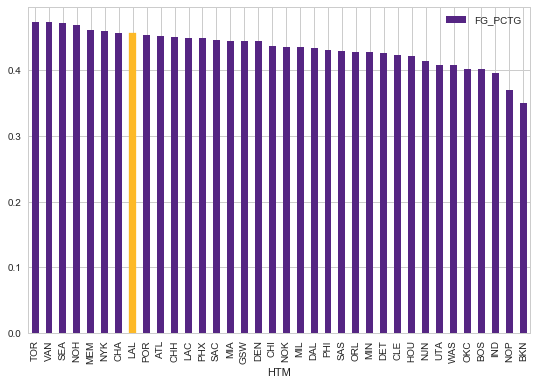

In [85]:
htm_plot=plot_pctg('HTM')

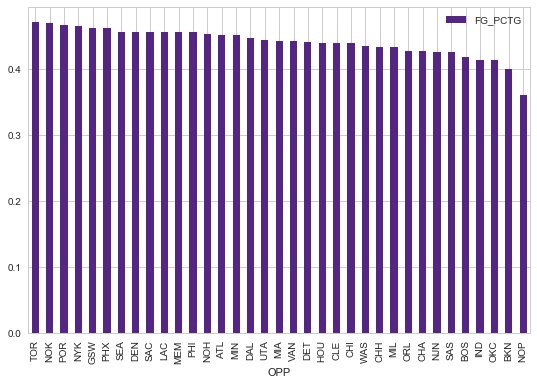

In [86]:
opp_plot=plot_pctg('OPP')

* The above bar plots show respectively in which court and against which team Kobe scored the most points.

In [87]:
from matplotlib.patches import Circle, Rectangle, Arc

def add_patches(p):
    ax=plt.gca()
    for i in p:
        ax.add_patch(i)

In [88]:
def plot_shotchart(sc,hb=False):
    fig, ax = plt.subplots(ncols=1, sharey=True, figsize=(8, 12))
    plt.xlim(-250,250)
    plt.ylim(-47.5,702.5)
    
    c = 'white' if hb else 'black'
    
    patches = [Rectangle((-250, -47.5), 500, 0, linewidth=2, color=c),
    Rectangle((-250, -47.5), 0, 940, linewidth=2, color=c),
    Rectangle((250, -47.5), 0, 940, linewidth=2, color=c),
    Rectangle((-250, 422.5), 500, 0, linewidth=2, color=c),
    Rectangle((-220, -47.5), 0, 140, linewidth=2, color=c),
    Rectangle((220, -47.5), 0, 140, linewidth=2, color=c),
    Rectangle((-30, -7.5), 60, 0, linewidth=4, color=c),
    Rectangle((-60, 142.5), 120, 0, linewidth=2, color=c),
    Rectangle((-60, -47.5), 120, 190, linewidth=2, color=c, fill=False),
    Rectangle((-80, -47.5), 160, 190, linewidth=2, color=c, fill=False),
    Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=2, color=c),
    Circle((0, 0), 7.5, linewidth=2, color=c, fill=False),
    Circle((0, 142.5), 60, linewidth=2, color=c, fill=False)]

    add_patches(patches)
    colors,labs=["#f75036", "#37f275"],["FG Missed", "FG Made"]
    
    if(not hb):
        for i in [0,1]:
            fg=sc[sc.SHOT_MADE_FLAG==i][["LOC_X","LOC_Y"]]
            plt.scatter(-fg.LOC_X, fg.LOC_Y, s=2, c=colors[i], label=labs[i])
        plt.legend()
    else:
        hb = ax.hexbin(sc.LOC_X, sc.LOC_Y, cmap="inferno", gridsize=72, norm=matplotlib.colors.LogNorm())
        cb = fig.colorbar(hb, ax=ax)

    plt.show()

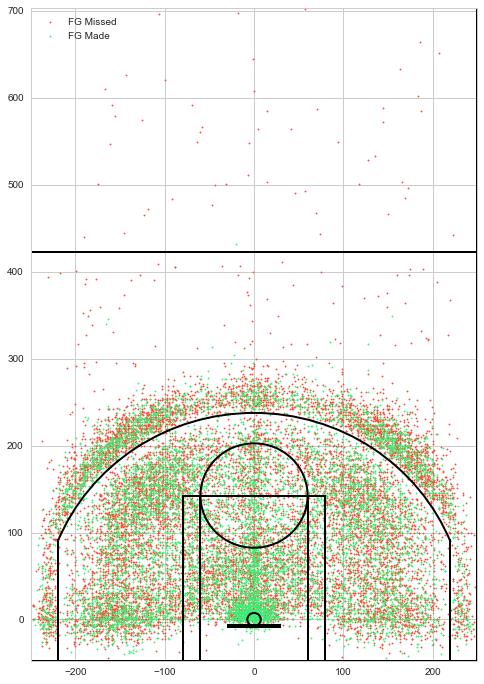

In [89]:
plot_shotchart(df,False)

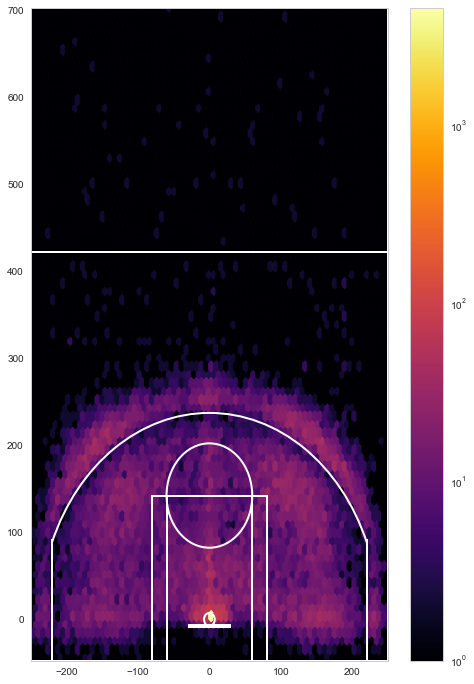

In [90]:
plot_shotchart(df,True)

### Estimation question
* Designing Logistic Regression Model to predict if Kobe will make the shot or won't
* Cleaning Data to better fit model
* Implementing the model
* Fitting the model
* Checking Accuracy of model
* Cross Validation using K-Fold
* Plotting ROC Curve

In [91]:
dfm=df.copy()
dfm=dfm.drop(['GAME_DATE','EVENT_TYPE'],axis=1)

#### Using statsmodels

In [92]:
import statsmodels.api as sm

In [93]:
def split_categorical(d, cat):
    d=pd.concat([d,pd.get_dummies(d[cat])],axis=1)
    return(d.drop(cat,axis=1))
dfm=split_categorical(dfm,['ACTION_TYPE','SHOT_ZONE_AREA','HTM','OPP'])
dfm

,PERIOD,SECONDS_REMAINING,THREE_POINT_SHOT,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_MADE_FLAG,SEASON,CLUTCH_SHOT,PUTBACK,REVERSE,ALLEYOOP,PULLUP,SLAM,FLOATING,FINGERROLL,TURNAROUND,DRIVING,RUNNING,FADEAWAY,STEPBACK,BANK,CUTTING,FOLLOWUP,ACTION_TYPE_Dunk Shot,ACTION_TYPE_Hook Shot,ACTION_TYPE_Jump Shot,ACTION_TYPE_Layup Shot,ACTION_TYPE_Tip Shot,SHOT_ZONE_AREA_Back_Court,SHOT_ZONE_AREA_Center,SHOT_ZONE_AREA_Left_Side,SHOT_ZONE_AREA_Left_Side_Center,SHOT_ZONE_AREA_Right_Side,SHOT_ZONE_AREA_Right_Side_Center,HTM_ATL,HTM_BKN,HTM_BOS,HTM_CHA,HTM_CHH,HTM_CHI,HTM_CLE,HTM_DAL,HTM_DEN,HTM_DET,HTM_GSW,HTM_HOU,HTM_IND,HTM_LAC,HTM_LAL,HTM_MEM,HTM_MIA,HTM_MIL,HTM_MIN,HTM_NJN,HTM_NOH,HTM_NOK,HTM_NOP,HTM_NYK,HTM_OKC,HTM_ORL,HTM_PHI,HTM_PHX,HTM_POR,HTM_SAC,HTM_SAS,HTM_SEA,HTM_TOR,HTM_UTA,HTM_VAN,HTM_WAS,OPP_ATL,OPP_BKN,OPP_BOS,OPP_CHA,OPP_CHH,OPP_CHI,OPP_CLE,OPP_DAL,OPP_DEN,OPP_DET,OPP_GSW,OPP_HOU,OPP_IND,OPP_LAC,OPP_MEM,OPP_MIA,OPP_MIL,OPP_MIN,OPP_NJN,OPP_NOH,OPP_NOK,OPP_NOP,OPP_NYK,OPP_OKC,OPP_ORL,OPP_PHI,OPP_PHX,OPP_POR,OPP_SAC,OPP_SAS,OPP_SEA,OPP_TOR,OPP_UTA,OPP_VAN,OPP_WAS
0,1,42,0,18,-140,116,0,1997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,608,0,16,-131,97,0,1997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2,517,1,23,-142,181,1,1997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,394,1,0,0,0,0,1997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,327,0,13,-10,138,1,1997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2,438,0,19,75,177,0,1997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,2,136,1,23,-64,223,1,1997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,3,205,0,0,0,0,1,1997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,3,113,0,19,-79,177,0,1997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9,3,74,1,23,-103,207,1,1997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [94]:
# Training, testing
from sklearn import model_selection
ttsplit=sklearn.model_selection.train_test_split(dfm,train_size=0.9,test_size=0.1)
train_data=ttsplit[0]
test_data=ttsplit[1]
print (type(train_data), type(test_data))
#dfm=dfm.reset_index().drop('index', axis=1)
#test_data=dfm.sample(frac=0.1)
#train_data=dfm.drop(test_data.index)
#print(train_data.shape, test_data.shape)

train_data.describe()

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


,PERIOD,SECONDS_REMAINING,THREE_POINT_SHOT,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_MADE_FLAG,SEASON,CLUTCH_SHOT,PUTBACK,REVERSE,ALLEYOOP,PULLUP,SLAM,FLOATING,FINGERROLL,TURNAROUND,DRIVING,RUNNING,FADEAWAY,STEPBACK,BANK,CUTTING,FOLLOWUP,ACTION_TYPE_Dunk Shot,ACTION_TYPE_Hook Shot,ACTION_TYPE_Jump Shot,ACTION_TYPE_Layup Shot,ACTION_TYPE_Tip Shot,SHOT_ZONE_AREA_Back_Court,SHOT_ZONE_AREA_Center,SHOT_ZONE_AREA_Left_Side,SHOT_ZONE_AREA_Left_Side_Center,SHOT_ZONE_AREA_Right_Side,SHOT_ZONE_AREA_Right_Side_Center,HTM_ATL,HTM_BKN,HTM_BOS,HTM_CHA,HTM_CHH,HTM_CHI,HTM_CLE,HTM_DAL,HTM_DEN,HTM_DET,HTM_GSW,HTM_HOU,HTM_IND,HTM_LAC,HTM_LAL,HTM_MEM,HTM_MIA,HTM_MIL,HTM_MIN,HTM_NJN,HTM_NOH,HTM_NOK,HTM_NOP,HTM_NYK,HTM_OKC,HTM_ORL,HTM_PHI,HTM_PHX,HTM_POR,HTM_SAC,HTM_SAS,HTM_SEA,HTM_TOR,HTM_UTA,HTM_VAN,HTM_WAS,OPP_ATL,OPP_BKN,OPP_BOS,OPP_CHA,OPP_CHH,OPP_CHI,OPP_CLE,OPP_DAL,OPP_DEN,OPP_DET,OPP_GSW,OPP_HOU,OPP_IND,OPP_LAC,OPP_MEM,OPP_MIA,OPP_MIL,OPP_MIN,OPP_NJN,OPP_NOH,OPP_NOK,OPP_NOP,OPP_NYK,OPP_OKC,OPP_ORL,OPP_PHI,OPP_PHX,OPP_POR,OPP_SAC,OPP_SAS,OPP_SEA,OPP_TOR,OPP_UTA,OPP_VAN,OPP_WAS
count,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.00000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.00000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.00000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000
mean,2.512936,320.350496,0.209348,13.444694,7.829926,90.837900,0.446518,2006.567987,0.155781,0.000594,0.019934,0.006871,0.016880,0.015650,0.003605,0.007083,0.052719,0.085673,0.035033,0.049962,0.004114,0.016456,0.000212,0.000467,0.042879,0.006744,0.767113,0.177496,0.005768,0.002545,0.435872,0.120409,0.132369,0.151158,0.157647,0.011494,0.001569,0.014293,0.008355,0.002587,0.012215,0.012215,0.022606,0.026126,0.011875,0.026168,0.023963,0.011791,0.024217,0.488803,0.019595,0.011197,0.010688,0.02320,0.008822,0.009416,0.004284,0.003054,0.012512,0.006447,0.012851,0.012469,0.024387,0.025108,0.025956,0.024557,0.015862,0.012893,0.020824,0.005132,0.012469,0.020019,0.002121,0.024854,0.017092,0.006447,0.023963,0.023284,0.042667,0.047502,0.022860,0.05187,0.050556,0.026253,0.049410,0.039401,0.024133,0.022054,0.045890,0.016583,0.020740,0.006574,0.004072,0.025235,0.016032,0.022139,0.023030,0.049410,0.048308,0.048011,0.04835,0.031216,0.025193,0.042243,0.009458,0.023030
std,1.153755,208.049891,0.406852,9.351710,110.517022,87.408485,0.497142,4.946546,0.362655,0.024361,0.139776,0.082607,0.128825,0.124121,0.059935,0.083863,0.223476,0.279887,0.183866,0.217871,0.064010,0.127224,0.014561,0.021595,0.202588,0.081844,0.422680,0.382096,0.075730,0.050382,0.495881,0.325446,0.338899,0.358210,0.364417,0.106593,0.039584,0.118698,0.091026,0.050799,0.109846,0.109846,0.148646,0.159514,0.108328,0.159639,0.152937,0.107945,0.153727,0.499885,0.138605,0.105223,0.102831,0.15054,0.093511,0.096578,0.065311,0.055177,0.111156,0.080034,0.112634,0.110970,0.154251,0.156457,0.1

In [95]:
y_train = train_data.SHOT_MADE_FLAG
X_train = train_data.drop('SHOT_MADE_FLAG',axis=1)
y_test = test_data.SHOT_MADE_FLAG
X_test = test_data.drop('SHOT_MADE_FLAG',axis=1)

logit = sm.Logit(y_train, X_train)
log_res = logit.fit()

print(log_res.summary())

         Current function value: 0.609496
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         SHOT_MADE_FLAG   No. Observations:                23578
Model:                          Logit   Df Residuals:                    23476
Method:                           MLE   Df Model:                          101
Date:                Wed, 17 Jan 2018   Pseudo R-squ.:                  0.1134
Time:                        17:15:59   Log-Likelihood:                -14371.
converged:                      False   LL-Null:                       -16208.
                                        LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
PERIOD                              -0.0305      0.015     -1.973      0.049      -0.061      -0.000

C:\Users\dwan0\Documents\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\dwan0\Documents\Anaconda3\lib\site-packages\statsmodels\base\model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
C:\Users\dwan0\Documents\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\dwan0\Documents\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\dwan0\Documents\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [96]:
#while np.isnan(log_res.pvalues).any() or max(log_res.pvalues)>0.05:
#    if np.isnan(log_res.pvalues).any():
#        print("DROP NAN: ",X_train.columns[np.where(np.isnan(log_res.pvalues))])
#        X_train=X_train.drop(X_train.columns[np.where(np.isnan(log_res.pvalues))],axis=1)
#        X_test=X_test.drop(X_test.columns[np.where(np.isnan(log_res.pvalues))],axis=1)
#    elif max(log_res.pvalues)>0.05:
#        print("DROP MAX: ",log_res.pvalues.idxmax())
#        X_train=X_train.drop(log_res.pvalues.idxmax(),axis=1)
#        X_test=X_test.drop(log_res.pvalues.idxmax(),axis=1)
#    logit = sm.Logit(y_train, X_train)
#    log_res = logit.fit()

while max(log_res.pvalues)>0.05:
    if max(log_res.pvalues)>0.05:
        print("DROP MAX: ",log_res.pvalues.idxmax())
        X_train=X_train.drop(log_res.pvalues.idxmax(),axis=1)
        X_test=X_test.drop(log_res.pvalues.idxmax(),axis=1)
    logit = sm.Logit(y_train, X_train)
    log_res = logit.fit()

print(log_res.summary())

DROP MAX:  HTM_BKN
         Current function value: 0.609496
         Iterations: 35


C:\Users\dwan0\Documents\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\dwan0\Documents\Anaconda3\lib\site-packages\statsmodels\base\model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
C:\Users\dwan0\Documents\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\dwan0\Documents\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\dwan0\Documents\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


DROP MAX:  SHOT_ZONE_AREA_Back_Court
         Current function value: 0.609496
         Iterations: 35
DROP MAX:  OPP_NOP


C:\Users\dwan0\Documents\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.609496
         Iterations: 35
DROP MAX:  CUTTING


C:\Users\dwan0\Documents\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.609723
         Iterations 8
DROP MAX:  OPP_VAN
Optimization terminated successfully.
         Current function value: 0.609726
         Iterations 8
DROP MAX:  OPP_CHH
Optimization terminated successfully.
         Current function value: 0.609735
         Iterations 8
DROP MAX:  OPP_OKC
Optimization terminated successfully.
         Current function value: 0.609747
         Iterations 8
DROP MAX:  OPP_MIL
Optimization terminated successfully.
         Current function value: 0.609751
         Iterations 8
DROP MAX:  OPP_CHA
Optimization terminated successfully.
         Current function value: 0.609757
         Iterations 8
DROP MAX:  OPP_ATL
Optimization terminated successfully.
         Current function value: 0.609764
         Iterations 8
DROP MAX:  OPP_CHI
Optimization terminated successfully.
         Current function value: 0.609771
         Iterations 8
DROP MAX:  OPP_SAS
Optimization terminated successf

* The table above gives us the coefficients of the paraments in our logistic model
$$ Shot\ Made\ Model = \hat p(x)_{shot_made}=\frac{exp(\beta_0 + \beta_1 * Var_1 + \beta_2 * Var_2 +\ \ ...\ \ + \beta_n * Var_n)}{1 + exp(\beta_0 + \beta_1 * Var_1 + \beta_2 * Var_2 +\ \ ...\ \ + \beta_n * Var_n)}\\ $$
* A first look at the p values of every paraments shows that our analysis from the Data Visualizations above are true.
* Almost all major categorical variables have very low p values proving they have a significant relationship with Kobe making or missing a shot, and hence they are important for our model.
* As for the quantitative variables, as we expected above, X Location is not signficant, neither Y Location is because it is highly correlated with distance and distance covers its variability.

In [97]:
y_pred = log_res.predict(X_test)
pred_ct=pd.concat(y_test.align(y_pred.rename('pred')),axis=1)
pred_ct['pred']=np.where(pred_ct.pred>0.5,1,0)
pred_ct



,SHOT_MADE_FLAG,pred
3633,0,0
7626,0,0
23982,1,1
13780,0,0
12774,0,0
9690,1,0
14655,0,0
8773,0,1
17451,0,0
955,1,0


* The table above shows the predicted values of our model and the true values using the testing data.

In [98]:
ct=pd.crosstab(index=pred_ct['SHOT_MADE_FLAG'],columns=pred_ct['pred'])
display(ct)
TN, FP, FN, TP = [ct.loc[i,j] for i in range(2) for j in range(2)]
acc=(TN+TP)/ct.sum().sum()
sens=TP/(TP+FN)
spec=TN/(FP+TN)
print("Accuracy: {0:.3f}\nTPR = Sensitivity: {1:.2f}\nFPR = 1 - Specificity({2:.2f}): {3:.2f}".format(acc,sens,spec,1-spec))

pred,0,1
SHOT_MADE_FLAG,,
0,1232,199
1,674,515


Accuracy: 0.667
TPR = Sensitivity: 0.43
FPR = 1 - Specificity(0.86): 0.14


* The table above shows the True Positives, True Negatives, False Positives, False Negatives. Using these values we calculate Sensitivity, Specificity, Accuracy which will be done later.
* Using the ROC Curve, we can select the best threshold for our model to increase accuracy, sensitivity, specificity.

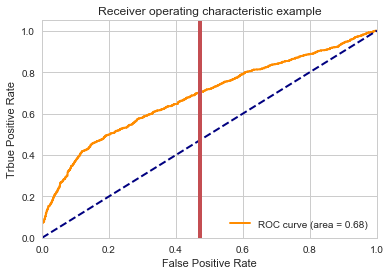

In [99]:
from sklearn import metrics

fpr, tpr, threshold = sklearn.metrics.roc_curve(y_true=y_test,y_score=y_pred)
roc_auc=sklearn.metrics.auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.axvline(x=threshold[np.argmax(tpr - fpr)],linewidth=4,color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('Trbue Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [100]:
pred_ct=pd.concat(y_test.align(y_pred.rename('pred')),axis=1)
pred_ct['pred']=np.where(pred_ct.pred>threshold[np.argmax(tpr - fpr)],1,0)

ct=pd.crosstab(index=pred_ct['SHOT_MADE_FLAG'],columns=pred_ct['pred'])
display(ct)

TN, FP, FN, TP = [ct.loc[i,j] for i in range(2) for j in range(2)]
acc=(TN+TP)/ct.sum().sum()
sens=TP/(TP+FN)
spec=TN/(FP+TN)
print("Accuracy: {0:.3f}\nTPR = Sensitivity: {1:.2f}\nFPR = 1 - Specificity({2:.2f}): {3:.2f}".format(acc,sens,spec,1-spec))

pred,0,1
SHOT_MADE_FLAG,,
0,1217,214
1,649,540


Accuracy: 0.671
TPR = Sensitivity: 0.45
FPR = 1 - Specificity(0.85): 0.15


* Using the optimal threshold from the ROC Curve, it is possible to have a very minimal decrease in accuracy, however, this small loss is compensated with high increase in sensitivity and specificity.

#### Using sklearn model
* We can get a better result with scikit-learn
* scikit-learn applies some kind of parameter regularization and different cost function comparing to statmodel.

In [101]:
import sklearn.linear_model as sklin
import sklearn.cross_validation as skcros
import sklearn.model_selection as skmod
import sklearn.metrics as skmet

C:\Users\dwan0\Documents\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [102]:
# Logistic Regression
logreg = sklin.LogisticRegression()
logreg.fit(X_train, y_train)

#Predict
y_pred2 = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.67


* We get an accuracy of almost 70% which is a very good number for such variable. Making or missing a shot is a variable with very low predictibility due to the numerous factors that affect the result and due to the its natural randomness. Among the studies previously done by other researches, 70% is considered a good accuracy for our model.

In [103]:
# K Fold Cross Validation
kfold = skmod.KFold(n_splits=10, random_state=7)
modelCV = logreg
scoring = 'accuracy'
results = skmod.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

# Confusion Matrix
confusionmatrix = skmet.confusion_matrix(y_test, y_pred2)
print(confusionmatrix)

print(skmet.classification_report(y_test, y_pred2))

10-fold cross validation average accuracy: 0.680
[[1229  202]
 [ 666  523]]
             precision    recall  f1-score   support

          0       0.65      0.86      0.74      1431
          1       0.72      0.44      0.55      1189

avg / total       0.68      0.67      0.65      2620

